## Introduction
Today we're going to build linear regression, logistic regression, ridge regression and Naive Bayes using health related data. Struecture codes will be provided. Along the way, we'll play with some fun Python codes. By the end, we'll have completed a data science project from start to finish.

In [1]:
# View current directory
!pwd
# Step 1: Make a folder named session_10 under the class folder if you haven't created.
# !mkdir session10
# Make a folder named data under the session_10 if you haven't created.
# !mkdir data

/Users/pengning/Desktop/Bootcamp/session_10


In [16]:
# Step 2: Import packages and classes
# It is a good habit to install packages at the 
# beginning of the codes
import pandas  as pd # Data manipulation
import numpy as np # Data manipulation
from sklearn.linear_model import LinearRegression # Model building
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from matplotlib import style
from sklearn.metrics import mean_squared_error #Evaluation metrics
from sklearn.metrics import mean_absolute_error #Evaluation metrics
import statsmodels.api as sm
from termcolor import colored as cl
from sklearn.model_selection import train_test_split
# Display the plot in notebook and make plots sorted
%matplotlib inline 

## Simple linear regression

In [17]:
# Download data to data folder
health_df_1 = pd.read_csv('./data/table501.txt', delimiter = ",")

In [18]:
# To double check whether table501.txt has been loaded succesfully and
# have a brief view on the data. 
# Always list part of the data and check if they make sense.
health_df_1.head()

,SBP,Age
0,144,39
1,138,45
2,145,47
3,162,65
4,170,67


In [19]:
# Extrac X (SBP) and Y (Age)
X = health_df_1.SBP
Y = health_df_1.Age
# Call .reshape() on x because this array is required to be two-dimensional
X = X.to_numpy().reshape(-1, 1)
Y = Y.to_numpy()

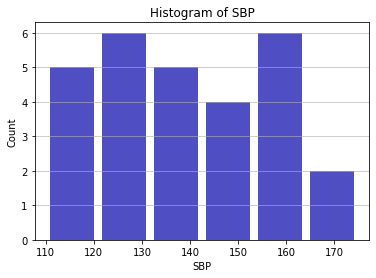

In [20]:
# Step 3: visualize the data
# Create a histogram with normal curve
# An "interface" to matplotlib.axes.Axes.hist() method
# Use funtion matplotlib.pyplot.hist(x, alpha=n)to plot histogram
n, bins, patches = plt.hist(x=X, # Dataset
                            bins='auto', 
                            color='#0504aa', 
                            alpha=0.7, # Transparency
                            rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('SBP')
plt.ylabel('Count')
plt.title('Histogram of SBP')
plt.show()

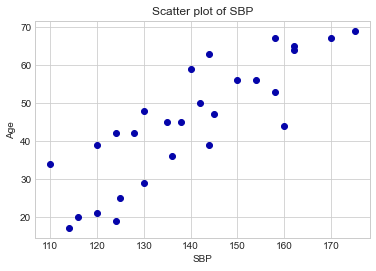

In [21]:
# Create a scatterplot to further visualice the relationship between
# SBP and Age
plt.style.use('seaborn-whitegrid')
plt.scatter(X, Y, color='#0504aa')
plt.xlabel('SBP')
plt.ylabel('Age')
plt.title('Scatter plot of SBP')
plt.show()

In [22]:
# Step 4: built linear regression model
# Create model
slr_model = LinearRegression()
slr_model.fit(X, Y)
intercept = slr_model.intercept_
slope = slr_model.coef_
print('intercept:', intercept)
print('slope:', slope)
y_pred = slr_model.predict(X)
# print('predicted response:', y_pred, sep='\n')
y_pred = intercept + slope * X

intercept: -59.85538876763905
slope: [0.75037069]


### Choose an evaluation metric
* We then need to compare these predictions with the actual result and measure them in some way.
* This is where the selection of evaluation metric is important. For regression, we measure the distance between the predicted and actual answers in some way. The shorter the distance, the more correct the model is. 
* We cover three common metrics below:
  * `Mean Absolute Error`: which provides a mean score for all the predicted versus actual values as an absolute value 
  * `Means Squared Error`: which provides a mean score for all the predicted versus actual values as a square of the absolute value
  * `R2`: which we recommend you research as an exercise to grow your knowledge. WIkipedia and `sklearn` document are a great place to start!


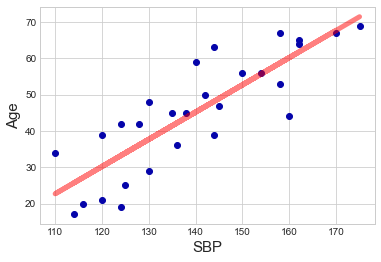

In [23]:
# Step 5: visualize regression
plt.xlabel('SBP', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.scatter(X, Y, color='#0504aa')
plt.plot(X, intercept + slope*X, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.show()

### Choose an evaluation metric
* We then need to compare these predictions with the actual result and measure them in some way.
* This is where the selection of evaluation metric is important. For regression, we measure the distance between the predicted and actual answers in some way. The shorter the distance, the more correct the model is. 
* We cover three common metrics below:
  * `Mean Absolute Error`: which provides a mean score for all the predicted versus actual values as an absolute value 
  * `Means Squared Error`: which provides a mean score for all the predicted versus actual values as a square of the absolute value
  * `R2`: the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

In [25]:
# Obtain the value of MSE 
MSE = mean_squared_error(Y, y_pred)
print('MSE:', MSE)
# Obtain the value of MAE 
MAE = mean_absolute_error(Y, y_pred)
print('MAE:', MAE)
# Obtain the value of 𝑅² using .score()
r_sq = slr_model.score(X, Y)
slope = slr_model.coef_
intercept = slr_model.intercept_
print('R squrare:', r_sq)

MSE: 69.67565944959195
MAE: 7.093106571052525
R squrare: 0.7122099509065329


## Multiple linear regression

In [26]:
health_df_2 = pd.read_csv('./data/smoke.csv')
health_df_2.head()

,ID,Mother_age,Mother_smoking,Birth_weight
0,1,18,1.0,110
1,2,23,1.3,97
2,3,34,2.0,88
3,4,19,2.0,92
4,5,22,1.4,105


In [27]:
# pandas has a lot of functionality to assist with exploratory data analysis
# .describe() provide summary statistics on all numeric columns
print(health_df_2.describe())
# we can also see the shape of the data
print("\n The shape of dataset 2 is:", health_df_2.shape)

             ID  Mother_age  Mother_smoking  Birth_weight
count  20.00000   20.000000       20.000000      20.00000
mean   10.50000   24.900000        1.365000     103.00000
std     5.91608    6.290343        0.791584      27.25513
min     1.00000   16.000000        0.200000      22.00000
25%     5.75000   20.000000        0.775000      89.50000
50%    10.50000   22.500000        1.300000     102.50000
75%    15.25000   29.500000        2.000000     120.75000
max    20.00000   38.000000        3.000000     142.00000

 The shape of dataset 2 is: (20, 4)


In [28]:
X = health_df_2[['Mother_age', 'Mother_smoking']].to_numpy()
Y = health_df_2['Birth_weight'].to_numpy().reshape(-1, 1)

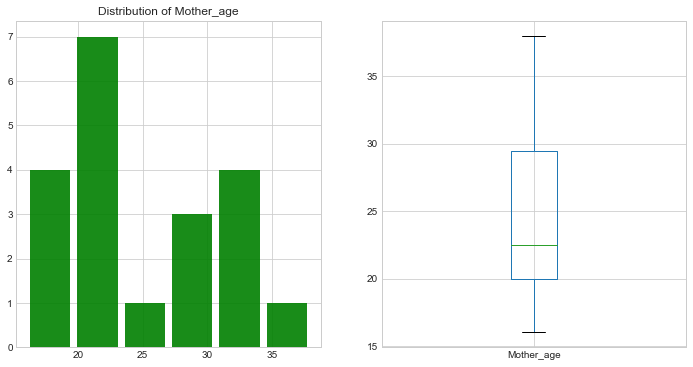

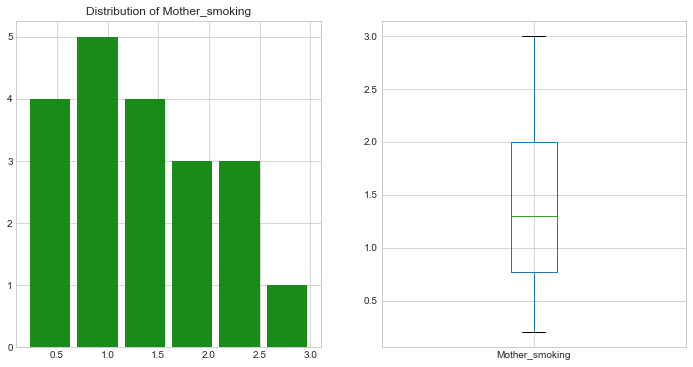

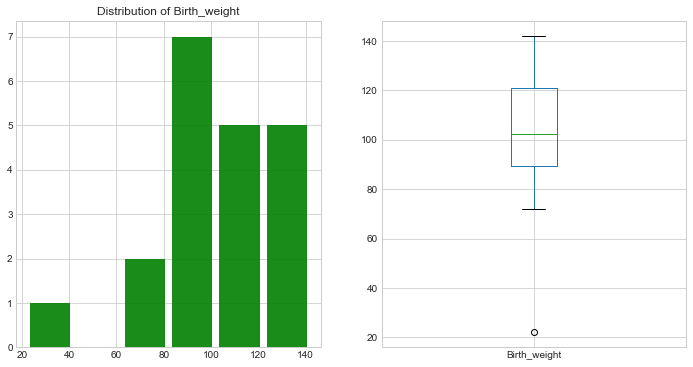

In [29]:
# we can build on this analysis by plotting the distribution and boxplots for each column
# 
# we loop through all the columns
for col in health_df_2.columns[1:]: # the first row is index, ignore
    # and for each column we create space for one row with 2 charts 
    f, axes = plt.subplots(1, 2, figsize=(12, 6))
    # our first chart is a histogram and we set the title 
    health_df_2[col].hist(bins='auto', color='g', alpha=0.9, rwidth=0.85, ax = axes[0])
    axes[0].set_title('Distribution of '+ col)
    # our second column is the boxplot 
    health_df_2.boxplot(column = col, ax = axes[1])
    # we then use this to command to display the charts
    plt.show()

In [30]:
df_2 = health_df_2.drop('ID', axis=1)

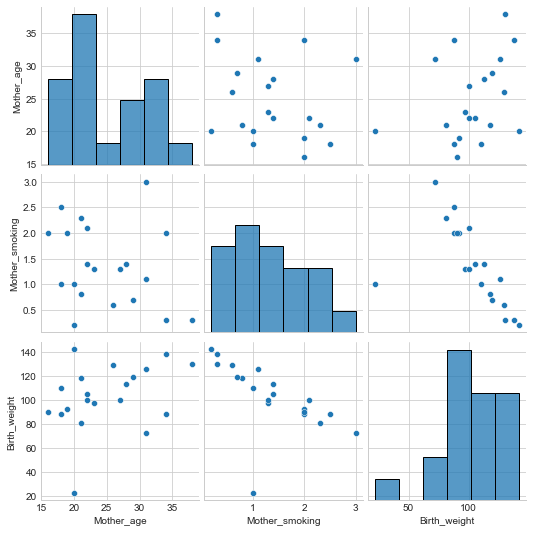

In [31]:
# Another way to gain insight from the relationship betwwen variables without
# using for loop
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)
sns.pairplot(df_2)
plt.savefig('pairplor_health_df_2.png')
plt.show()

In [46]:
# Split the data set into trianing and validation
X = df_2.drop("Birth_weight", axis = 1)
Y = df_2["Birth_weight"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [56]:
# Since Mother smoking has a strong negative relationship
# with birth weight, we test a slm first
slr = LinearRegression()
slr.fit(X_train["Mother_smoking"].to_numpy().reshape(-1, 1), y_train) # Dimension purpose
y_pred = slr.predict(X_test["Mother_smoking"].to_numpy().reshape(-1, 1))

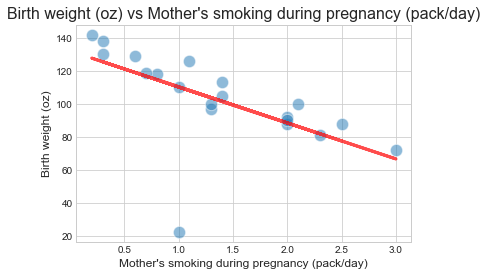

In [70]:
slr_slope = slr.coef_
slr_intercept = slr.intercept_

sns.scatterplot(x = 'Mother_smoking', 
                y = 'Birth_weight',
                data = df_2[["Mother_smoking", "Birth_weight"]],
                s = 150, 
                alpha = 0.5,
                edgecolor = 'white')
plt.plot(df_2["Mother_smoking"], slr_slope*df_2["Mother_smoking"] + slr_intercept, color = 'r', linewidth = 3, alpha=.7)
plt.title("Birth weight (oz) vs Mother's smoking during pregnancy (pack/day)", fontsize = 16)
plt.ylabel("Birth weight (oz)", fontsize = 12)
plt.xlabel("Mother's smoking during pregnancy (pack/day)", fontsize = 12)
plt.savefig('bw_ms_slrfit.png')
plt.show()

In [78]:
# Evaluate slr model
# Obtain the value of R square
print(cl("R-Squared :", attrs = ["bold"]),
      slr.score(X_test["Mother_smoking"].to_numpy().reshape(-1, 1),
                y_test))
# Obtain the value of MSE 
MSE = mean_squared_error(y_test, y_pred)
print(cl("MSE:", attrs = ["bold"]), MSE)
# Obtain the value of MAE 
MAE = mean_absolute_error(y_test, y_pred)
print(cl("MAE:", attrs = ["bold"]), MAE)

R-Squared : 0.886026509049755
MSE: 51.13848072073806
MAE: 6.767090395480231
